In [1]:
import pandas as pd
import numpy as np



In [2]:
book_tags_pd = pd.read_csv('5751/book_tags.csv')
books_pd = pd.read_csv('5751/books.csv')
ratings_pd = pd.read_csv('5751/ratings.csv')
toread_pd = pd.read_csv('5751/toread.csv')

In [3]:
book_tags_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130500 entries, 0 to 130499
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   goodreads_book_id  130500 non-null  int64
 1   tag_id             130500 non-null  int64
 2   count              130500 non-null  int64
dtypes: int64(3)
memory usage: 3.0 MB


In [4]:
books_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    1305 non-null   int64  
 1   goodreads_book_id          1305 non-null   int64  
 2   best_book_id               1305 non-null   int64  
 3   work_id                    1305 non-null   int64  
 4   books_count                1305 non-null   int64  
 5   isbn                       1277 non-null   object 
 6   isbn13                     1281 non-null   float64
 7   authors                    1305 non-null   object 
 8   original_publication_year  1302 non-null   float64
 9   original_title             1272 non-null   object 
 10  title                      1305 non-null   object 
 11  language_code              1169 non-null   object 
 12  average_rating             1305 non-null   float64
 13  ratings_count              1305 non-null   int64

In [5]:
ratings_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141473 entries, 0 to 1141472
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype
---  ------   --------------    -----
 0   user_id  1141473 non-null  int64
 1   book_id  1141473 non-null  int64
 2   rating   1141473 non-null  int64
dtypes: int64(3)
memory usage: 26.1 MB


In [6]:
toread_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146454 entries, 0 to 146453
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  146454 non-null  int64
 1   book_id  146454 non-null  int64
dtypes: int64(2)
memory usage: 2.2 MB


### Q3: How many unique users are present in the dataset [ratings.csv] ? (N)

In [7]:
len(ratings_pd['user_id'].unique())
print(f'Total number of users: {len(ratings_pd["user_id"].unique())}')

Total number of users: 52023


### Q8: Which is the least used tag, i.e. mapped with the lowest number of books [book_tags.csv]? (In case of more than one tag, mention the tag id with the least numerical value) (N)

array([[<Axes: title={'center': 'tag_id'}>]], dtype=object)

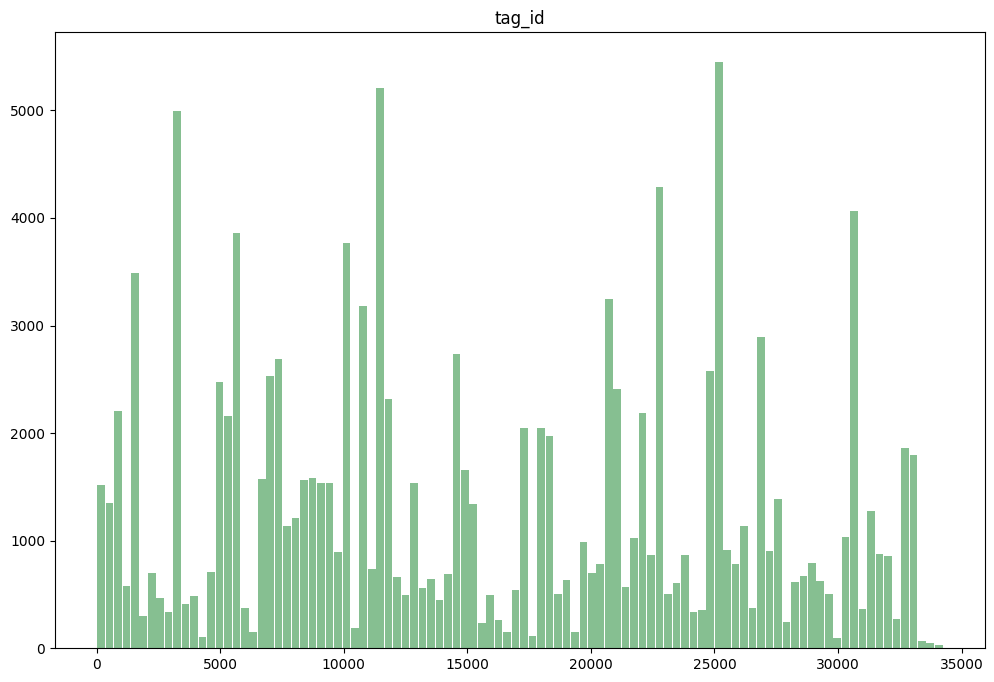

In [8]:
book_tags_pd.hist(
    column='tag_id',
    bins=100,
    grid=False,
    figsize=(12,8),
    color='#86bf91',
    zorder=2,
    rwidth=0.9
)

In [9]:
dict_tag_id_to_book = {}
for label, row in book_tags_pd.iterrows():
  # dict_tag_id_to_book
  if row['tag_id'] in dict_tag_id_to_book:
    dict_tag_id_to_book[row['tag_id']].append([row['goodreads_book_id'], row['count']])
  else:
    dict_tag_id_to_book[row['tag_id']] = [[row['goodreads_book_id'], row['count']]]

dict_tag_id_to_book

{30574: [[1, 167697],
  [2, 24549],
  [3, 496107],
  [5, 11909],
  [6, 298],
  [8, 2823],
  [10, 3226],
  [11, 32303],
  [13, 75870],
  [28, 35420],
  [29, 5492],
  [30, 692],
  [33, 116442],
  [34, 15494],
  [264, 44],
  [295, 108955],
  [304, 323],
  [357, 8024],
  [359, 2651],
  [360, 25198],
  [365, 3562],
  [880, 5809],
  [1420, 139322],
  [1618, 31674],
  [1622, 94350],
  [1624, 7791],
  [1625, 40397],
  [1823, 6698],
  [1824, 7318],
  [1885, 1401],
  [1953, 402942],
  [1990, 182],
  [2002, 5880],
  [2095, 659],
  [2156, 220502],
  [2442, 188],
  [2493, 155806],
  [2623, 227548],
  [2677, 469],
  [2696, 1384],
  [2744, 74770],
  [2784, 3829],
  [2872, 808],
  [2932, 72088],
  [2978, 351],
  [2998, 222156],
  [3008, 89682],
  [3049, 11048],
  [3087, 4733],
  [3102, 2772],
  [3103, 6027],
  [3388, 1405],
  [3581, 10202],
  [3586, 16603],
  [3590, 8891],
  [3656, 2259],
  [3679, 2870],
  [3685, 42465],
  [3690, 1321],
  [3692, 2178],
  [3698, 116],
  [3710, 5039],
  [3711, 44784],
 

In [10]:
min_tag_count = np.inf
min_tag_id = []
for tag_id, book_list in dict_tag_id_to_book.items():
  if len(book_list) < min_tag_count:
    min_tag_count = len(book_list)
    min_tag_id = [tag_id]
  elif len(book_list) == min_tag_count:
    min_tag_id.append(tag_id)
print(min_tag_count, min(min_tag_id))
print('min number of tag used by a book:', min(min_tag_id))

1 0
min number of tag used by a book: 0


### Q5: Which (tag_id) is the most frequently used ie. mapped with the highest number of books [book_tags.csv] ? (In case of more than one tag, mention the tag id with the least numerical value) (N)

In [11]:
max_tag_count = -1 
max_tag_ids = []
for tag_id, book_list in dict_tag_id_to_book.items():
  if (len(book_list)) > max_tag_count:
    max_tag_count = len(book_list)
    max_tag_ids = [tag_id]
  elif (len(book_list)) == max_tag_count:
    max_tag_ids.append(tag_id)
print(f'Most used tag id is: {min(max_tag_ids)} and use count is: {max_tag_count}')

Most used tag id is: 5751 and use count is: 1305


### Q9: Which book (title) has the minimum (average_rating) [books.csv], if more than 1 book have same average rating, sort the books by ['title'] in alphabetical order and use the first book in the sorted list? (S)

In [12]:
books_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    1305 non-null   int64  
 1   goodreads_book_id          1305 non-null   int64  
 2   best_book_id               1305 non-null   int64  
 3   work_id                    1305 non-null   int64  
 4   books_count                1305 non-null   int64  
 5   isbn                       1277 non-null   object 
 6   isbn13                     1281 non-null   float64
 7   authors                    1305 non-null   object 
 8   original_publication_year  1302 non-null   float64
 9   original_title             1272 non-null   object 
 10  title                      1305 non-null   object 
 11  language_code              1169 non-null   object 
 12  average_rating             1305 non-null   float64
 13  ratings_count              1305 non-null   int64

In [13]:
min_avg_rating = books_pd['average_rating'].min(axis=0)
print(f'minimum average rating is: {min_avg_rating}')
min_rating_book = books_pd[books_pd['average_rating'] == min_avg_rating]
min_rating_book_with_sorted = min_rating_book.sort_values(by= 'title', ascending= True)
print(f'Minimum rating book title is: {min_rating_book_with_sorted["title"]}')

minimum average rating is: 2.76
Minimum rating book title is: 1054    The Finkler Question
Name: title, dtype: object


### Q4: Which book (title) has the maximum number of ratings based on (work_ratings_count) [books.csv] ? (S)

In [32]:
max_rating = books_pd['work_ratings_count'].max()
print(f'Maximum rating of book count is: {max_rating}')
max_rating_book = books_pd[books_pd['work_ratings_count'] == max_rating]
max_rating_with_sorted = max_rating_book.sort_values(by='title', ascending= True)
max_rating_with_sorted.head()
print(f'Maximum book rating title is: {max_rating_with_sorted["title"]}')
a = str(max_rating_with_sorted["title"][0])
print(f'Maximum number of ratings based on Work_rating count is:\n{a}')

Maximum rating of book count is: 4800065
Maximum book rating title is: 0    Harry Potter and the Sorcerer's Stone (Harry P...
Name: title, dtype: object
Maximum number of ratings based on Work_rating count is:
Harry Potter and the Sorcerer's Stone (Harry Potter, #1)


### Q7: Which book (goodreads_book_id) is marked as to-read by most users [books.csv,toread.csv] ? (N)

In [15]:
dict_book_id_user_id = {}
for label, row in toread_pd.iterrows():
  if row['book_id'] in dict_book_id_user_id:
    dict_book_id_user_id[row['book_id']].append(row['user_id'])
  else:
    dict_book_id_user_id[row['book_id']] = [row['user_id']]
max_book_id = -1
max_book_mark_count = -1
for x, y in dict_book_id_user_id.items():
  if max_book_mark_count < len(y):
    max_book_id = x
    max_book_mark_count = len(y)

goodreads_book_id = books_pd[books_pd['book_id'] == max_book_id]
print(f'max book mark goodreads book id is: {goodreads_book_id["goodreads_book_id"]}')


max book mark goodreads book id is: 3    5470
Name: goodreads_book_id, dtype: int64


### Q1: How many books do not have an original title [books.csv] ? (N)

In [16]:
print(f" total number book with doesn't have original title: {books_pd['original_title'].isna().sum()}")

 total number book with doesn't have original title: 33


 ### Q2: How many unique books are present in the dataset ? Evaluate based on the 'book_id'? [books.csv] (N)

In [17]:
print(f"Total number of unique values in the dataset is: {len(books_pd['book_id'].unique())} ")

Total number of unique values in the dataset is: 1305 


### Q11: How many unique tags are there in the dataset [book_tags.csv] ? (N)

In [18]:
print(f"Total number of unique tags in the dataset is: {len(book_tags_pd['tag_id'].unique())}")

Total number of unique tags in the dataset is: 7067


### Q14: Predict sentiment using Textblob. How many positive titles (original_title) are there [books.csv] ? (cut-off >=0) N

In [20]:
from textblob import TextBlob

In [28]:
list_pos = []
for _, row in books_pd.iterrows():
  try:
    temp = TextBlob(row['original_title'])
    if temp.sentiment[0] >=0:
      list_pos.append(temp)
  except:
    pass

print('total number of positive sentiments are: ', len(list_pos))


total number of positive sentiments are:  1150
